# COMP90016 - Assignment 1
Version 1 Last edited 13/3/2023

## Semester 1, 2023

In [112]:
NAME = "Arya Araban"

ID = "1439683"


This assignment should be completed by each student individually. Make sure you read this entire document, and ask for help if anything is not clear. Any changes or clarifications to this document will be announced via the LMS.

Please make sure you review the University's rules on academic honesty and plagiarism: https://academichonesty.unimelb.edu.au/

Do not copy any code from other students or from the internet. This is considered plagiarism. You submission must be your own work.

Your completed notebook file containing all your answers will be turned in via LMS. Please also submit an HTML file with the output cleared.

To complete the assignment, finish the tasks in this notebook.

The tasks are a combination of writing your own code, interpreting the results and answering related short-answer questions.

In some cases, we have provided test input and test output that you can use to try out your solutions. These tests are just samples and are **not** exhaustive - they may warn you if you've made a mistake, but they are not guaranteed to. It's up to you to decide whether your code is correct.

**Remember to save your work early and often.**

## Marking

Cells that must be completed to receive marks are clearly labelled. Some cells are code cells, in which you must complete the code to solve a problem. Others are markdown cells, in which you must write your answers to short-answer questions. 

Cells that must be completed to receive marks are labelled like this:

`# -- GRADED CELL (1 mark) - complete this cell --`

Some graded cells are code cells, in which you must complete the code to solve a problem. Other graded cells are markdown cells, in which you must write your answers to short-answer questions. 

You will see the following text in graded code cells:

```
# YOUR CODE HERE
raise NotImplementedError()
```

***You must remove the `raise NotImplementedError()` line from the cell, and replace it with your solution.***

Only add answers to graded cells. If you want to import a library or use a helper function, this must be included in a graded cell.

Only graded cells will be marked.
**Don't make changes outside graded cells, and don't add or remove cells from the notebook**.

>Word limits, where stated, will be strictly enforced. Answers exceeding the limit **will not be marked**.

>Run-time limits will be imposed for each coding question. The run-time of a code cell can be calculated by including `%time` at the top of your cell. Cells exceeding the run-time limit **will not be marked**. The run-time limits only apply to test cases that are included in this document.

No marks are allocated to commenting in your code. We do however, encourage efficient and well-commented code.

The total marks for the assignment add up to 100, and it will be worth 10% of your overall subject grade.

Part 1: 55 marks

Part 2: 25 marks

Part 3: 20 marks


## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student ID number below:

## Overview

In this assignment, you will answer questions about working with short reads, sequence motifs and codon bias.

You will use the `biopython` library in your functions. You may want to refer to sections of the `biopython` documentation for additional help (https://biopython.org/wiki/Documentation). Additional to `biopython` and standard Python 3 functions and methods, you may also use any other library we have used in Computational Genomics including `collections`, `numpy`, `pandas`, `math`, `itertools`, `seaborn` and `matplotlib`.

## Part 1: Working with short reads

### Setup

In [113]:
import os
import requests
from IPython.core.display import HTML

# Handy function to fetch our datafile
def fetch_file(url): 
    response = requests.get(url)
    if response.status_code == 200:
        print('File found!')
        filename = os.path.basename(url).split('?', 1)[0]
        with open(filename, 'wb') as f:
            f.write(response.content)
            f.close()
        print(f'Saved to: {filename}')
    else:
        print('File not found')

In [114]:
# Make the notebook pretty
HTML(requests.get('https://raw.githubusercontent.com/melbournebioinformatics/COMP90016/main/data/2023/style/custom.css').text)

In [115]:
# Fetch assignment data
url = 'https://github.com/melbournebioinformatics/COMP90016/blob/main/data/2023/Assignment_01/data/comp90016_assignment_1.fastq.gz?raw=true'
fetch_file(url)

File found!
Saved to: comp90016_assignment_1.fastq.gz


First, we read in a read set from the `comp90016_assignment_1.fastq.gz` file. Note that converting a readset into a list of `biopython` objects makes it easier to handle.

In [116]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
import gzip
from Bio import SeqIO, SeqRecord, Seq

In [118]:
fname = 'comp90016_assignment_1.fastq.gz'

# Our fastq file is compressed using gzip. 
# We must open it before SeqIO can read the contents
with gzip.open(fname, "rt") as handle:
    readset = list(SeqIO.parse(handle, "fastq"))

### Questions
In the cells below, complete the following tasks:

<div class="info">
<h3> Question 1.1 </h3>

(5 marks)  
 
<b>Challenge:</b> Write a Python function to compute the following stats for an input readset:

- The minimum read length
- The mean read length and 
- The maximum read length

Input: a list of Bio.SeqRecord.SeqRecord objects. 

Output: Return a `list` with the minimum read length as an integer, the mean read length as a floating-point number and the maximum read length as in integer. 

The elements of the output list should be in the order: minimum read length, mean read length, maximum read length. 
    
If the input list is empty, return None.
</div>

In [119]:
# GRADED CELL 1.1 (5 marks, max 1 min run-time)

def read_lengths(reads):

    """
    Calculate minimum, mean and maximum read lengths in a readset. 
    Assume reads is a list of Bio.SeqRecord.SeqRecord objects containing DNA sequences. 
    Return a list with the minimum read length as an integer, the mean read length as a floating-point number and the maximum read length as in integer.
    The output list should be in the order: minimum read length, mean read length, maximum read length.
    If the input list is empty, return None.
    """
    if len(reads) == 0: 
      return None 

    lens = [len(read) for read in reads]

    return [min(lens), sum(lens)/len(lens), max(lens)]

In [120]:

a = SeqRecord.SeqRecord(Seq.Seq('GTTGGATTCATGAAAGA'), 'ERR024571.2', '', '')
print(a)
a.seq = Seq.Seq('AA')
print(a)

ID: ERR024571.2
Number of features: 0
Seq('GTTGGATTCATGAAAGA')
ID: ERR024571.2
Number of features: 0
Seq('AA')


In [121]:
# Test your function in this cell
# First we will create a list of dummy reads
demo_reads = [SeqRecord.SeqRecord(Seq.Seq('GTTGGATTCATGAAAGA'), 'ERR024571.2', '', ''),
             SeqRecord.SeqRecord(Seq.Seq('ATGAAATGAATGTCTTGA'), 'ERR024571.2', '', '')]

print(read_lengths(demo_reads)) # should output [17, 17.5, 18]

print(read_lengths(readset))

[17, 17.5, 18]
[56, 75.445, 76]


In [122]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="info">

<h3> Question 1.2 </h3>

(15 marks)

Suppose quality control metrics indicated that there were unacceptable levels of adapter contamination in the reads. The sequence of the adapter has been determined and it matches an adapter sequence used in the sequencing. 

<b>Challenge:</b> Write a Python function that performs the following tasks and returns the new readset as list of SeqRecord objects.

- If a read has an unbroken subsequence of length min_match bases or greater in common with the adapter sequence, trim all bases in the reads that are 3’ of the start of the adapter sequence match, including the first matching base.
- Remove any read that is shorter than min_length bases long after trimming.

Assumptions:
- Assume min_match and min_length are positive integers. 
- Assume reads is list of Bio.SeqRecord.SeqRecord objects, each object contains a sequence that is a Bio.Seq.Seq object.   
- Assume adapter_seq is a Bio.SeqRecord.SeqRecord object. If the readset list or the adapter_seq is empty, return None.

</div>

In [123]:
# GRADED CELL 1.2 (15 marks, max 1 min run-time)
def adapter_trim(reads, adapter_seq, min_match, min_length):
    """
    Trim reads in a readset based on a given adapter sequence.
    If a read has an unbroken subsequence of length min_match bases or greater in common with the adapter sequence, trim all bases in the reads that are 3’ of the start of the adapter sequence match, including the first matching base. 
    Remove any read that is min_length bases long or shorter after trimming.
    Assume min_match and min_length are positive integers.
    Assume reads is list of Bio.SeqRecord.SeqRecord objects.
    Assume adapter_seq is a Bio.SeqRecord.SeqRecord object.
    If the readset list or the adapter_seq is empty, return None.
    Return the new readset as a list of Bio.SeqRecord.SeqRecord objects.
    """

    def find_first_common_substring_index(str1, str2, min_match):
      """
      This functions loops over all substrings of str2 having length of min_match.
      For each of these substrings, it checks if it is also a substring of str1, if so, it keeps track of that index 
      Finally it will return the min from all found indexes. 
      this will ensure that str1[:returned_index] will have no more subsequences from str2.

      note that we do not have to check for integers higher than min_match. 
      if you have two matching sequences of length 'n', this always implies there are matching sequences less than 'n' as well. 
      """

      idxs = []
      
      for i in range(len(str2) - min_match + 1):
          subseq = str2[i:i + min_match]
          if subseq in str1:
              index = str1.find(subseq)
              idxs.append(index)
              
      if not idxs:
          return None

      return min(idxs)
      
    if len(reads) == 0 or not adapter_seq:
      return None 
    
    filtered_reads = []

    for read in reads: 
      
      output_read_str = str(read.seq)

      matching_idx = find_first_common_substring_index(read.seq, adapter_seq.seq, min_match)

      if matching_idx: # if there is a matching sequence that is min_match
        output_read_str = str(read.seq[:matching_idx]) # do trimming

    
      if len(output_read_str) < min_length: # checking length of trimmed
        continue # drop the read if trimmed length less than or equal to min_length
        
      
      output_seqrecord = SeqRecord.SeqRecord(Seq.Seq(output_read_str), '', '', '')

      filtered_reads.append(output_seqrecord)

    return filtered_reads

In [124]:
# Test your function in this cell
illumina_adapter = SeqRecord.SeqRecord(Seq.Seq('GATCGGAAGAGCTCGTATGCCGTCTTCTGCTTGGATCGGAAGAGCACACG'), '', '', '')
demo_adapter = SeqRecord.SeqRecord(Seq.Seq('GATGAAAG'), '', '', '')

# should output a list with just one SeqRecord object containing the sequence ATGAAATGAATGTCTTGA
print(adapter_trim(demo_reads, demo_adapter, 7, 15)) 

# Test with longer min length
print(len(adapter_trim(readset, illumina_adapter, 10, 50)))

[SeqRecord(seq=Seq('ATGAAATGAATGTCTTGA'), id='', name='', description='', dbxrefs=[])]
177


In [125]:
# --- AUTOGRADING CELL DO NOT EDIT ----



<div class="info">
    
<h3>Question 1.3</h3>
    
(10 marks)

<b>Challenge:</b> Write Python code to produce two histograms showing the distribution of read lengths in...

- The original `comp90016_assignment_1.fastq.gz` readset.
- The output readset after adapters have been removed from `comp90016_assignment_1.fastq.gz` using your function from part 1.2.
- Trim reads with settings: `adapter_seq=illumina_adapter, min_match=10, min_length=50`

You may show both distributions on the same set of axes, or two completely separate histograms. The plots should be produced inline, in the Jupyter notebook. Choose an appropriate bin-width. Label your axes appropriately (include units). Use labels to make it clear which distribution has been pre-processed.

You may use the readset list of Bio.SeqRecord.SeqRecord objects as input. Your code does not have to include a function.

</div>

In [126]:
# Here's some Jupyter magic to render plots in the notebook
%matplotlib inline

# You may want to import some additional packages for building and formatting your graphs (non-essential)
# Un-comment as reqired
#import numpy as np
import matplotlib.pyplot as plt
#import seaborn
#from collections import Counter

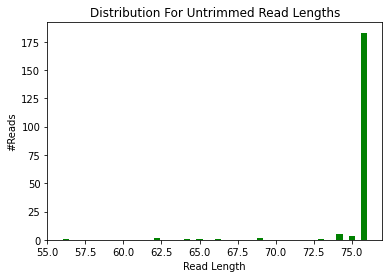

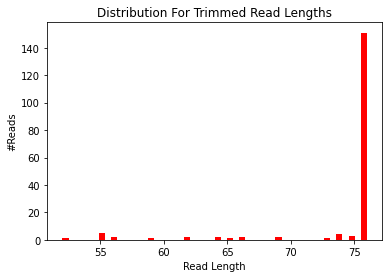

In [127]:
# GRADED CELL 1.3 (10 marks, max 1 min run-time)

# Use this cell to make your histograms.
trimmed_readset = adapter_trim(readset, illumina_adapter, 10, 50)

lengths_untrimmed = []
lengths_trimmed = []  

for record in readset:
    lengths_untrimmed.append(len(record.seq))

for record in trimmed_readset: 
  lengths_trimmed.append(len(record.seq))

# Plot histogram for the untrimmed read lengths
plt.hist(lengths_untrimmed, bins=50, color='green')
plt.xlabel('Read Length')
plt.ylabel('#Reads')
plt.title('Distribution For Untrimmed Read Lengths')
plt.show()

# Plot the histogram of trimmed read lengths
plt.hist(lengths_trimmed, bins=50, color='red')
plt.xlabel('Read Length')
plt.ylabel('#Reads')
plt.title('Distribution For Trimmed Read Lengths')
plt.show()

In [128]:
# Set the variables below to report total read count and mean read length before and after trimming.

# Stats for reads

length_stats = sum(lengths_untrimmed) / len(lengths_untrimmed)

# Stats for trimmed reads
trimmed_reads = trimmed_readset
trimmed_length_stats = sum(lengths_trimmed) / len(lengths_trimmed)


print(f'Mean read length before adapter trimming : {length_stats:.3f}')
print(f'Mean read length after adapter trimming : {trimmed_length_stats:.3f}')

print(f'Number of reads in the readset before adapter trimming : {len(readset)}')
print(f'Number of reads in the readset after adapter trimming : {len(trimmed_reads)}')

Mean read length before adapter trimming : 75.445
Mean read length after adapter trimming : 74.322
Number of reads in the readset before adapter trimming : 200
Number of reads in the readset after adapter trimming : 177


<div class="question">
<h3>Question 1.4</h3>
    
(5 marks, max 50 words)

In words, compare the two histograms and the two mean read lengths from before and after adapter removal.

</div>

#### -- GRADED CELL (5 marks) - complete this cell --  

The histograms have similar shape. If we look closely, it's apparent that #reads in last column for hist1 are over 175 while for hist2 it's around 145, implying most of the trimming happens there. 

The total mean read lengths will also be reduced by around 1 unit after applying trimming.

<div class="question">

<h3>Question 1.5</h3>

(10 marks, max 100 words)

Describe factors should impact your choice of min_match and min_length when using your adapter removal function? 

Describe two possible consequences of choosing inappropriate values for these parameters?
    
</div>

    

#### -- GRADED CELL (10 marks) - complete this cell -- 
The two parameters should be selected in such a way that trimming is performed in a relatively accurate manner while also maintaining high quality reads. 

In order to know the consequences of not properly selecting the variables, we have the following example: 

If "min_match" is set to be low, more reads will be discarded, some of which may be valuable. However, If this parameter is set to be high, it may also result in keeping reads which have high levels of adapter contamination. 

Similarly, if "min_length" is set to be low, we risk keeping contaminated reads.





<div class="question">
<h3>Question 1.6</h3>

(10 marks, max 150 words)

Sequence data can be stored and shared in a variety of file formats.
Describe the main differences between FASTA, FASTQ and GenBank file formats.  For each of these three file formats, give an example of the type of data that might be appropriately stored in this format.

</div>
    

#### -- GRADED CELL (10 marks) - complete this cell -- 

FASTA, FASTQ, and GenBank are file formats which are used to store the sequence data obtained from DNA or protein sequencing 

FASTA stores nucleotide or amino acid sequences and uses a single-line header.
This format is commonly used for storing short reads. 
~~ example: animal reference genome sequence can be stored as a FASTA file.

FASTQ stores sequence data as well, however unlike FASTA, it stores quality scores for the sequences alongside the sequences. 
~~ example: sequencing data and quality scores from a next-generation sequencing run can be stored as a FASTQ file

GenBank is a file format used to store sequence data in the GenBank sequence database. This file format stores annotated sequence data alongside metadata which has information on genes, coding regions, etc.. ~~ 
 example: genomic sequence with annotations for features such as protein-coding genes can be stored as a GenBank file.


## Part 2: Sequence motifs
Sequence motifs are short, recurring patterns in nucleic-acid sequences. Many are involved in important biological functions.

### Setup

In [129]:
# Set up two DNA sequences to test your code on. Do not change these sequences.
linear_seq = Seq.Seq('TTACAGTGATTATGAAAACTTTGCGGGGCATGGCTACGACTTGTTCAGCCACGTCCGAGGGCAGAAACCTCGAGGGGTTTGTATGTTCAGCTATCTTCTACCCATCCCCGGAGGTTAAGTACGAGGGGAGATGCGGAAGAGGCTCTCGATCATCCCGTGGGACATCAACCTTTCCCTTGATAAAGCACCCCGCTCGGGTA')
circular_seq = Seq.Seq('TGGCAGAGAGAACGCCTTCTGAATTGTGCTATCCTTCGACCTTATCAAAGCTTGCTACCAATAATTAGGATTATTGCCTTGCGACAGACCTCCTACTCACACTGCCTCACATTGAGCTAGTCAGTGAGCGATTAGCTTGACCCGCTCTCTAGGGTCGCGAGTACGTGAGCTAGGGCTCCGGACTGGGCTATATAGTCGAG')

# Set up a dictionary of sequence motifs. Do not change this dictionary.
motif_dict = {'motif_a': Seq.Seq('TACAGTG'), 
              'motif_b': Seq.Seq('AGCTTGCT'), 
              'motif_c': Seq.Seq('ATATATAC'), 
              'motif_d': Seq.Seq('CGAGGGG'), 
              'motif_e': Seq.Seq('CGAGTG')}

### Questions

<div class="info">

<h3>Question 2.1</h3>

(10 marks)

<b>Challenge:</b> Write a Python function to count the number of times sequence motifs are present in a DNA sequence. 

Assume motifs is a dictionary with motif names as strings for keys and Bio.Seq.Seq objects for values. Assume seq is a Bio.Seq.Seq object. 

Return a pandas DataFrame with each motif represented as a row. The first column should contain motif names as strings, the second column should contain integer counts of exact matches. Overlapping motifs should be considered. The column names should be “Motif” and “Counts”. If either seq or motifs are empty, return None.

</div>

In [130]:
# GRADED CELL Question 2.1 (10 marks, max 1 min run-time)

import pandas as pd
import re

def motif_count(seq, motifs):
    """
    Count the number of times sequence motifs are present in a DNA sequence. 
    Overlapping motifs should be considered.
    Assume motifs is a dictionary with motif names as strings for keys and Bio.Seq.Seq objects for values. 
    Assume seq is an Bio.Seq.Seq object. 
    Return a pandas DataFrame with each motif represented as a row. 
    The first column should contain motif names as strings, the second column should contain integer counts of exact matches. 
    The column names should be “Motif” and “Counts”, in that order. 
    If either seq or motifs are empty, return None.
    """

    if len(seq) == 0 or len(motifs) == 0:
        return None
        
    df_list = [] # list of tuples
    for motif_name, motif_seq in motifs.items():

        # using regex to find the count of occurrences of motif_seq inside seq, even overlapping ones:
        count = len(re.findall(f'(?={str(motif_seq)})', str(seq))) 

        df_list.append((motif_name, count))
    
    df = pd.DataFrame(df_list, columns=['Motif', 'Counts'])
    return df

In [131]:
# ~~ Test your function in this cell ~~

demo_seq = Seq.Seq('GTTGGATTCATGAAAGA')
demo_motifs = {'motif_a': Seq.Seq('GTTG'), 'motif_b': Seq.Seq('AAAA')}

# Should output a pandas dataframe with 2 rows and 2 columns. Row 1: motif_a, 1. Row 2: motif_b, 0
'''
     Motif  Counts
0  motif_a       1
1  motif_b       0
'''
print(motif_count(demo_seq, demo_motifs)) 

# Test on linear seq
print(motif_count(linear_seq, motif_dict))


     Motif  Counts
0  motif_a       1
1  motif_b       0
     Motif  Counts
0  motif_a       1
1  motif_b       0
2  motif_c       0
3  motif_d       2
4  motif_e       0


In [132]:
# --- AUTOGRADING CELL DO NOT EDIT ----




<div class="info">

<h3>Question 2.2</h3>

(15 marks)

A colleague is working on sequence motifs in circular DNA molecules. Circular DNA molecules can also be stored in FASTQ files and Bio.Seq.Seq objects but care has to be taken when programming so that the final base is treated as though it is adjacent to the first base. You decide to help your colleague by enhancing your function from 2.1

<b>Challenge:</b> Write a Python function to count the number of times sequence motifs are present in a circular DNA sequence. 

The function should count the number of exact matches and the number of near misses. A near miss is defined as a sequence that is the same length a sequence motif but has a single base mismatch. Assume motifs is a dictionary with motif names as strings for keys and Bio.Seq.Seq objects for values. Assume seq_circular is an Bio.Seq.Seq object. 

Return a pandas DataFrame with each motif represented as a row. The first column should contain motif names as strings, the second column should contain integer counts of exact matches, the third column should contain integer counts of near misses. The column names should be “Motif”, “Match_counts” and "Near_miss_counts". If either seq_circular or motifs are empty, return None.
    
</div>

In [133]:
# Import additional library
from collections import Counter 

# Helper function
# Use this to identify near miss instances of a reference motif i.e. containing a single base mismatch
def hamming_dist(s1, s2):
    """
    A helper function to calculate the hamming distance between two sequences.
    Assume the input sequences are strings.
    They should be of equal length in order to calculate hamming distance
    """
    assert len(s1) == len(s2)
    return sum(c1 != c2 for c1, c2 in zip(s1, s2))

In [134]:
# GRADED CELL Question 2.2 (15 marks, max 1 min run-time)

def motif_count_circular(seq, motifs):
    """
    Count the number of times sequence motifs are present in a circular DNA sequence. 
    Counts the number of exact matches and the number of near misses. 
    A near miss is defined as a sequence that is the same length a sequence motif but has a single base mismatch. 
    Assume motifs is a dictionary with motif names as strings for keys and Bio.Seq.Seq objects for values. 
    Assume seq_circular is an Bio.Seq.Seq object. 
    Return a pandas DataFrame with each motif represented as a row. 
    The first column should contain motif names as strings, the second column should contain integer counts of exact matches, the third column should contain integer counts of near misses.
    The column names should be “Motif”, “Match_counts” and "Near_miss_counts".
    If either seq_circular or motifs are empty, return None.
    """

    if len(seq) == 0 or len(motifs) == 0:
        return None

    df_list = [] # list of tuples
    for motif_name, motif_seq in motifs.items():
      
        # exact matches
        exact_count = len(re.findall(f'(?={str(motif_seq)})', str(seq))) 

        # near misses
        near_miss_count = 0

        for i in range(len(seq) - len(motif_seq) + 1):
          subsequence = seq[i:i+len(motif_seq)] # this is the subsequence that we will be comparing to motif

          #checking to see if motif_seq and the newly found subsequence only differ in one character
          if hamming_dist(subsequence,motif_seq) == 1:
            near_miss_count += 1

        df_list.append((motif_name, exact_count, near_miss_count))

    df = pd.DataFrame(df_list, columns=['Motif', 'Match_counts', 'Near_miss_counts'])


    return df

In [135]:
# Test your function in this cell
# Should output a pandas dataframe with 2 rows and 3 columns that looks like this:
'''
     Motif  Match_counts  Near_miss_counts
0  motif_a             1                 0
1  motif_b             0                 3
'''
print(motif_count_circular(demo_seq, demo_motifs)) 

# Consider function behaviour on a circular sequence
print(motif_count_circular(circular_seq, motif_dict))


     Motif  Match_counts  Near_miss_counts
0  motif_a             1                 0
1  motif_b             0                 3
     Motif  Match_counts  Near_miss_counts
0  motif_a             0                 0
1  motif_b             1                 0
2  motif_c             0                 0
3  motif_d             0                 0
4  motif_e             0                 1


In [136]:
# --- AUTOGRADING CELL DO NOT EDIT ----


## Part 3: Codon bias

### Setup
The frequency of occurrence of synonymous codons in coding DNA differs between species. Some codons that encode a particular amino acid are common, while other are rare. This is referred to as codon bias.

### Questions

<div class="info">
    
<h3>Question 3.1</h3>

(10 marks)

<b>Challenge:</b> Write a Python function to calculate the codon usage frequencies from a set of DNA coding sequences. 

Assume coding_seqs is a list of Bio.Seq.Seq objects. Assume the DNA sequences begin with a start codon, end with a stop codon and do not contain any introns. 

Return a 2D dictionary, where the keys are one-letter amino-acid strings and the values are dictionaries containing codon frequencies. The inner dictionaries must have DNA codon strings as keys and codon usage frequencies as values (floating-point numbers between 0 and 1). 

The codon usage frequency for a codon is the total number of occurrences of that codon divided by the total number of codons that code for the same amino acid. If coding_seqs is of length 0, return None.
    
</div>

In [137]:
# GRADED CELL Question 3.1 (10 marks, max 1 min run-time)

from collections import Counter
from collections import defaultdict

def codon_usage(coding_seqs):

    if len(coding_seqs)==0:
        return None
    
    
    codons_dict = {
        'A': ['GCT', 'GCC', 'GCA', 'GCG'],
        'C': ['TGT', 'TGC'],
        'D': ['GAT', 'GAC'],
        'E': ['GAA', 'GAG'],
        'F': ['TTT', 'TTC'],
        'G': ['GGT', 'GGC', 'GGA', 'GGG'],
        'H': ['CAT', 'CAC'],
        'I': ['ATT', 'ATC', 'ATA'],
        'K': ['AAA', 'AAG'],
        'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'],
        'M': ['ATG'],
        'N': ['AAT', 'AAC'],
        'P': ['CCT', 'CCC', 'CCA', 'CCG'],
        'Q': ['CAA', 'CAG'],
        'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'],
        'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'],
        'T': ['ACT', 'ACC', 'ACA', 'ACG'],
        'V': ['GTT', 'GTC', 'GTA', 'GTG'],
        'W': ['TGG'],
        'Y': ['TAT', 'TAC'],
        '*': ['TAA', 'TAG', 'TGA'] #stop codons
    }

    
    result_dict = defaultdict(lambda: defaultdict(int))


    for seq in coding_seqs:

      n=3
      codons = [seq[i:i+3] for i in range(0, len(seq), n)] # seperate by threes to find codons
      
      for codon in codons: 

        for amino_acid, codons in codons_dict.items():
          if codon in codons:
              # setting count of total number of occurrences of this codon as value. 
              # this will be modified further in the code
              result_dict[amino_acid][str(codon)] += 1 

    result_dict = {k: dict(v) for k, v in result_dict.items()} # converting default dict of default dict to regular dict of dicts 



    for amino_acid, codons in result_dict.items():
        sum_codon_vals = sum(codons.values()) # sum of the counts of codons mapping to current amino acid

        for codon, count in codons.items():
            result_dict[amino_acid][codon] /= sum_codon_vals # setting frequency based on total number of occurrences

    return dict(result_dict)
          


    

In [138]:
# ~~ Test your function in this cell ~~
demo_seqs = [Seq.Seq('ATGTCGTAA'), Seq.Seq('ATGTCCAAATAG')]

sequence_a = Seq.Seq('ATGGCTGAAGCCGCATCCCCAGCTTTTATAGAGTATCTCCCACGATCTGACCCGTTGCTCTGTATTATACACAAGGTTGGAGTCGGATGTGAGTCTTCTCACCGGAGACCCAAGACATAG')
sequence_b = Seq.Seq('ATGGTTCTCCTTTGGATCTTATTCGGCAAAAGCATCGCGGCGTCACTAGCTAGTTACGTTTTGAGGACGCTCGCAGATTCTGCCAACCAATCTTATACGAAAATACGGAGGCACGCGTAA')
sequence_c = Seq.Seq('ATGCTAGTGATCCCGTCGTGGGCTAGAGAGCGGCGAGAGTGGGGTTTGGAAATTCGCGACATTGAGCCAACTATGGCTAATGCCATGGGCGGATTATGGGGGTCACTCAGAACTGTATAA')
sequence_d = Seq.Seq('ATGCTACTTACCAAGAGATATCTTCTTAATACACTGATCCATAACGTCATTTCGCGGCTGAGATGGTGGGTGCATGAGCAAGTAATTGTGACTCCGCGGGTTTCGCCAAAGCAAACCTAA')
seqs = [sequence_a, sequence_b, sequence_c, sequence_d]

# Should return {'M':{'ATG':1.0}, 'S':{'TCG':0.5, 'TCC':0.5}, 'K':{'AAA':1.0}, '*':{'TAA':0.5, 'TAG':0.5}}
print(codon_usage(demo_seqs)) 

#print(codon_usage(seqs))



{'M': {'ATG': 1.0}, 'S': {'TCG': 0.5, 'TCC': 0.5}, '*': {'TAA': 0.5, 'TAG': 0.5}, 'K': {'AAA': 1.0}}


In [139]:
# --- AUTOGRADING CELL DO NOT EDIT ----


<div class="question">
    
<b>Question 3.2</b>

(10 marks, max 100 words)
Viruses infect cells and use the molecular machinery of their host cell to replicate themselves.

Explain why codon bias is an important factor in the potential transmission of RNA viruses between different species.

</div>


#### -- GRADED CELL (10 marks) - complete this cell -- 

As previously stated, codon bias is the bias in which certain codons are seen more commonly than other codons which code for the exact same amino-acid.

This has potential to effect translation, since some codons will be translated faster than others.

When a virus is transmitted from a host to a new species, the rate in which translation of the virus' genome happens in the new species will be effected when the codon bias of the new host species differs from the original species' codon bias. 

This can effect the virus' ability to replicate and infect the new species.





# END OF ASSIGNMENT

## Submitting

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you have filled in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"


Your completed notebook file containing all your answers must be turned in via LMS in `.ipynb` format.
You must also submit a copy of this notebook in `html` format with the output cleared.
You can do this by using the `clear all output` option in the menu.

Your submission should include **only two** files with names formatted as: **Assignment_1.ipynb** and **Assignment_1.html**
